# **Introduction**
---

**Object detection** refers to the **task of locating and classifying objects** within an **image or video**. In the context of **car object detection**, the problem involves **identifying and localizing all instances of cars within an image or video frame**.

The problem of **object detection** can be broken down into **two main sub-tasks**:

* **Object localization**: This involves identifying the **location** of **all objects** within the **image or video frame**. Typically, **object localization** is done by **drawing bounding boxes** around the **objects of interest**.

* **Object classification**: Once the objects have been localized, the next step is to **classify them into different categories**. In the case of **object detection**, this **involves distinguishing between different objects in the scene**.

Both of these **sub-tasks can be challenging**, especially in **real-world scenarios** where the **images or videos may contain cluttered backgrounds**, **occlusions**, and **variations in lighting** and **camera angles**. To address **these challenges**, various **computer vision techniques** have been developed, including **deep learning-based approaches** such as **YOLO, Faster R-CNN, and Mask R-CNN**, which are capable of **achieving high levels of accuracy and efficiency in object detection tasks**.

**Notebook Structure**
---

This notebook is divided into four main sections, each with a specific focus:

* **SetUp**: This section is dedicated to importing all the necessary modules required for the notebook to function. Additionally, we set some constants, which are used throughout the notebook for data loading.

* **Data Loading**: In this section, we load the data in the form of Numpy arrays.

* **Data Visualization**: Here, we create a plot that allows us to visualize the images present in the data along with their respective bounding boxes. This is an essential step in understanding the data and verifying that the data has been properly loaded.

* **YOLO**: In this section, we focus on the model - YOLOv3. We develop multiple functions that are used to make predictions on the data. These functions include filtering the predictions based on probability, applying non-max suppression, and finally, creating a function that brings everything together. The final function combines all the previously developed functions and provides the predicted bounding boxes, class probabilities, and labels for each image in the data. This section is the crux of the notebook and helps us to understand how YOLOv3 works in object detection.

# **YOLOv3 - You Only Look Once**
---
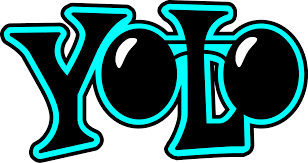

**YOLO (You Only Look Once)** is a **popular object detection algorithm** that can **recognize objects** in **images and videos in real-time**. **YOLOv3 is the latest version** of this **algorithm** and has **significantly improved the detection accuracy compared to its earlier versions**.

The **main idea** behind **YOLO** is to **divide the input image** into a **grid of cells** and for each cell, the **algorithm predicts** a set of **bounding boxes**, **confidence scores**, and **class probabilities**. The **predicted bounding boxes** are parameterized relative to the **corresponding cell**, and they **predict the center coordinates**, **width, and height of the object**. The **confidence score** indicates how **confident the algorithm** is that there is an **object in that box**, and the **class probabilities predict** the **probability of the object belonging to each class**.

**YOLOv3** introduces a **number of improvements** over its predecessor, including:

* **Feature Pyramid Network (FPN)**: YOLOv3 uses an FPN to extract features at different scales, allowing it to detect objects of different sizes.

* **Darknet-53 Backbone**: YOLOv3 uses a deep neural network architecture called Darknet-53 as its backbone. Darknet-53 is a powerful convolutional neural network that can extract features from images at different levels of abstraction.

* **Spatially-Separable Convolutional Layers**: YOLOv3 uses a new type of convolutional layer called spatially-separable convolutional layers. These layers are more computationally efficient and allow YOLOv3 to run faster on GPUs.

The architecture of YOLOv3 is as follows:
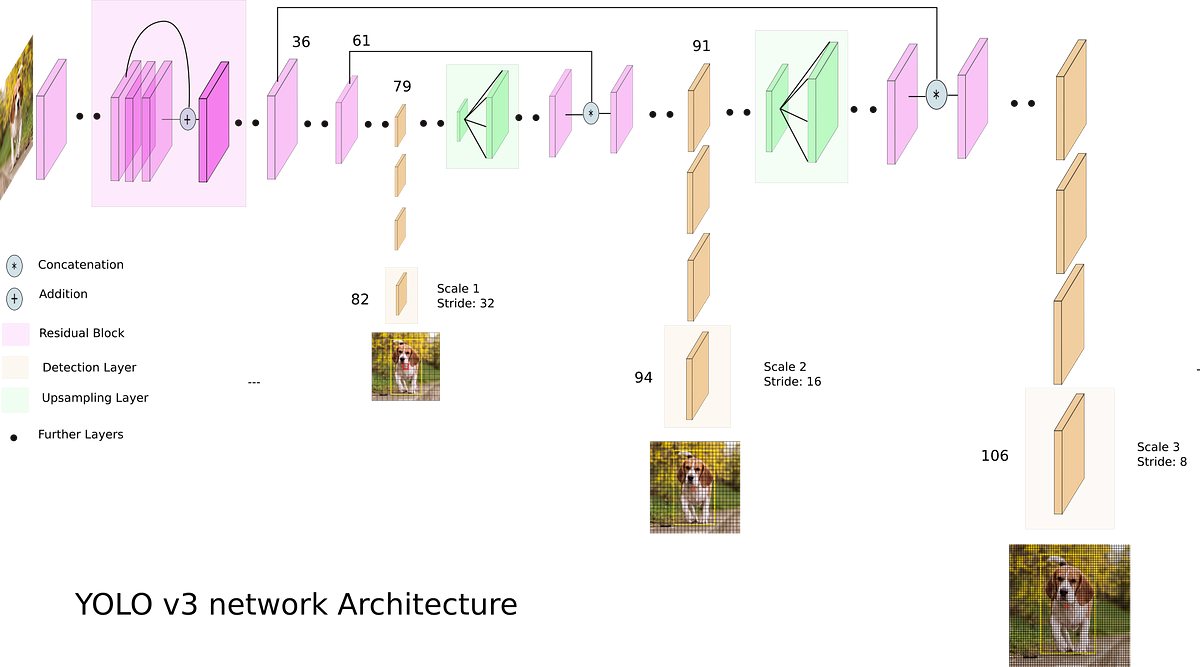

**YOLOv3** has 3 output layers which is uses to detect objects of small, medium or large size.

Overall, **YOLOv3 is a fast** and **accurate object detection algorithm** that can be used for a **wide range of applications, from surveillance to autonomous driving**.

The **most easiest and convenient way** to use **Yolo is through OpenCV**.

# 🧭 Testing YOLO v3 - Objects Detection Algorithm
* Using **'dnn'** OpenCV library for loading model of Neural Network from configuration file.

* Using weights trained on COCO dataset of 80 classes.


# 📥 Importing needed libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov3_416

/content/drive/MyDrive/Colab Notebooks/yolov3_416


# 📂 Loading COCO class labels from file

In [ ]:
# Opening file, reading, eliminating whitespaces, and splitting by '\n', which in turn creates list
labels = open('coco.names').read().strip().split('\n')  # list of names

# # Check point
print(labels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
# Defining paths to the weights and configuration file with model of Neural Network
weights_path = '/content/drive/MyDrive/Colab Notebooks/yolov3_416/yolov3.weights'
configuration_path = '/content/drive/MyDrive/Colab Notebooks/yolov3_416/yolo3_416.cfg'

# Setting minimum probability to eliminate weak predictions
probability_minimum = 0.5

# Setting threshold for non maximum suppression
threshold = 0.3


# 🗂️ Loading trained YOLO Objects Detector with the help of 'dnn' library from OpenCV

In [ ]:
network = cv2.dnn.readNet(configuration_path, weights_path)

# Getting names of all layers
layers_names_all = network.getLayerNames()  # list of layers' names

# # Check point
print(layers_names_all)


('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
# Getting only output layers' names that we need from YOLO algorithm
output_layers_names = network.getUnconnectedOutLayersNames()
output_layers_names  # list of layers' names


('yolo_82', 'yolo_94', 'yolo_106')

# 🗀 Loading input image from file

In [ ]:
# Our image initially is in RGB format
# But now we open it in BGR format as function 'cv2.imread' opens it so
cap=cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/yolov3_416/airport.mp4")
#image_input = cv2.imread("/content/drive/MyDrive/Colab Notebooks/yolov3_416/JPEGImages/000002.jpg")

# Getting image shape
#image_input_shape = image_input.shape

# Check point
#print(image_input_shape)  # tuple of (917, 1222, 3)


# 🌈 Colours for representing every detected object

In [ ]:
# Seed the generator - every time we run the code it will generate by the same rules
# In this way we can keep specific colour the same for every class
np.random.seed(42)
# randint(low, high=None, size=None, dtype='l')
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

# Check point
print(colours.shape)  # (80, 3)
print(colours[0])  # [102 220 225]

(80, 3)
[102 220 225]


# 🖼️ Showing RGB image from video with bounding boxes and labels

In [ ]:
def detect_objects(image):
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
  network.setInput(blob)  # setting blob as input to the network
  output_from_network = network.forward(output_layers_names)
  # Seed the generator - every time we run the code it will generate by the same rules
  # In this way we can keep specific colour the same for every class
  np.random.seed(42)
  # randint(low, high=None, size=None, dtype='l')
  colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
  bounding_boxes = []
  confidences = []
  class_numbers = []
  h, w = image.shape[:2]  # Slicing from tuple only first two elements
  for result in output_from_network:
    # Going through all detections from current output layer
    for detection in result:
        # Getting class for current object
        scores = detection[5:]
        class_current = np.argmax(scores)

        # Getting confidence (probability) for current object
        confidence_current = scores[class_current]

        # Eliminating weak predictions by minimum probability
        if confidence_current > probability_minimum:
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format keeps center of detected box and its width and height
            # That is why we can just elementwise multiply them to the width and height of the image
            box_current = detection[0:4] * np.array([w, h, w, h])

            # From current box with YOLO format getting top left corner coordinates
            # that are x_min and y_min
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results into prepared lists
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)
  return [bounding_boxes,confidences,class_numbers]

In [ ]:
image_set=[]

In [ ]:
from IPython.display import clear_output

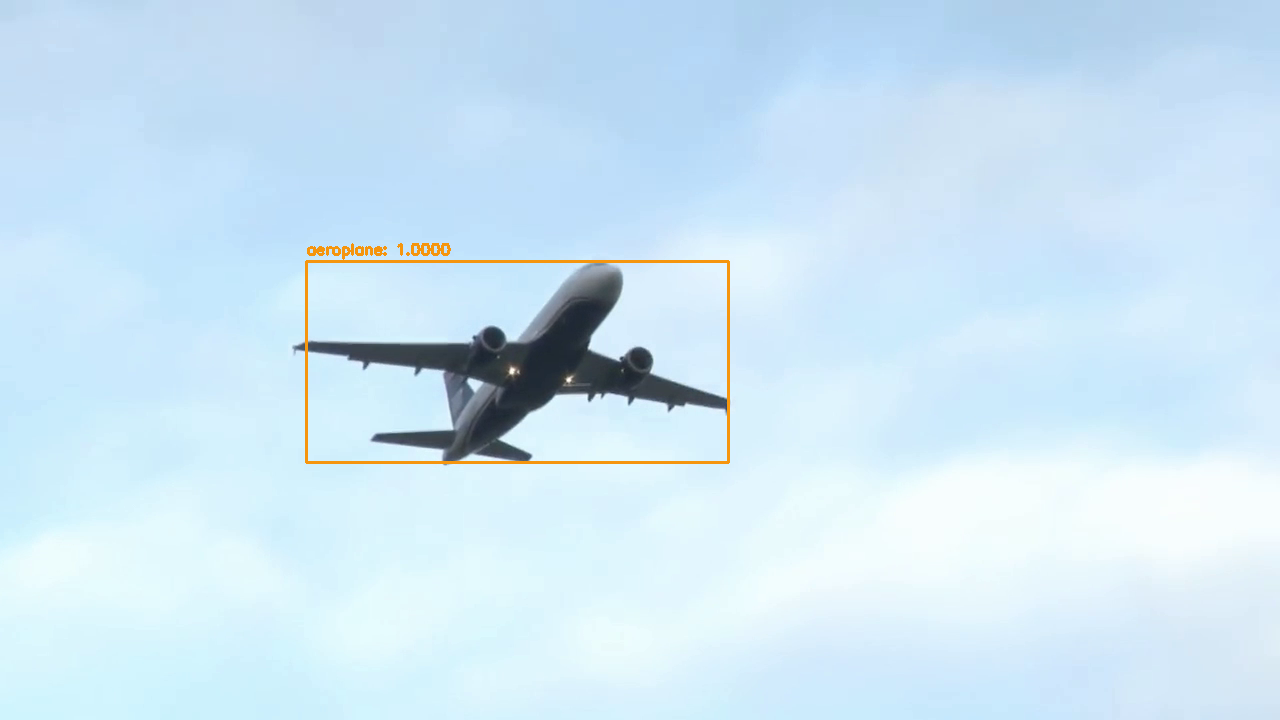

In [ ]:
import os
#test_dir = "/content/drive/MyDrive/Colab Notebooks/yolov3_416/JPEGImages"
#c=0
while True:
    #c=c+1
    #if c==11:
    #  break
    # Load image
    #img_path = os.path.join(test_dir, image_file)
    #image = cv2.imread(img_path)
    _,image=cap.read()
    #height, width, layers = image.shape
    #size = (width,height)
    # Detect objects in the image
    if _==False:
      break
    [bounding_boxes,confidences,class_numbers] = detect_objects(image)
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

    # Check point
    # Showing labels of the detected objects
    #for i in range(len(class_numbers)):
    #    print(labels[int(class_numbers[i])])

    # Saving found labels
    with open('found_labels.txt', 'w') as f:
        for i in range(len(class_numbers)):
            f.write(labels[int(class_numbers[i])])
    if len(results) > 0:
    # Going through indexes of results
      for i in results.flatten():
        # Getting current bounding box coordinates
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

        # Preparing colour for current bounding box
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 2)

        # Preparing text with label and confidence for current bounding box
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], round(confidences[i],2))

        # Putting text with label and confidence on the original image
        cv2.putText(image, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, colour_box_current, 2)
        #image_set.append(image)
    #%matplotlib inline
    #plt.rcParams['figure.figsize'] = (8.0, 8.0)
    from google.colab.patches import cv2_imshow
    clear_output(wait=True)
    cv2_imshow(image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 🗀 Storing images with bounding boxes and labels as a video

In [ ]:
from IPython.display import HTML
from base64 import b64encode
print("Making Video from plots")
out = cv2.VideoWriter('simul2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

for i in range(len(image_set)):
    out.write(image_set[i])
out.release()
print("Video made successfully")
mp4 = open('simul2.mp4','rb').read()
data_url = "data:simul2/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Making Video from plots
Video made successfully
